# Task 4: Housing Prices Prediction Project

# Author: Parasa Sasidhar 
Dataset: https://bit.ly/3uU4dtg

### Importing Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
os.getcwd()

'C:\\Users\\lenovo'

In [10]:
os.chdir('C:\\Users\\lenovo\\Downloads\\Global Terrorism - START data')

In [11]:
data=pd.read_csv("boston.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
print(data.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [21]:
data.shape

(506, 14)

In [22]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking the missing values

In [15]:
data.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Implementing Seaborn plots

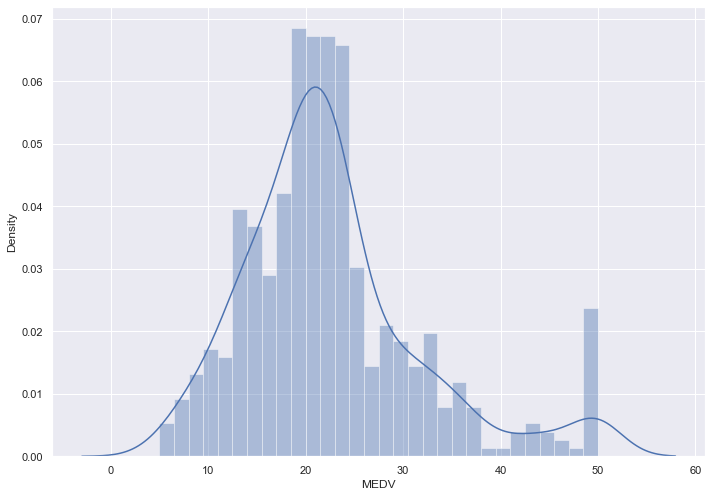

In [19]:
#creating distplot using seaborn Library
sb.set(rc = {'figure.figsize':(11.7,8.27)})
sb.distplot(data['MEDV'], bins = 30)
plt.show()

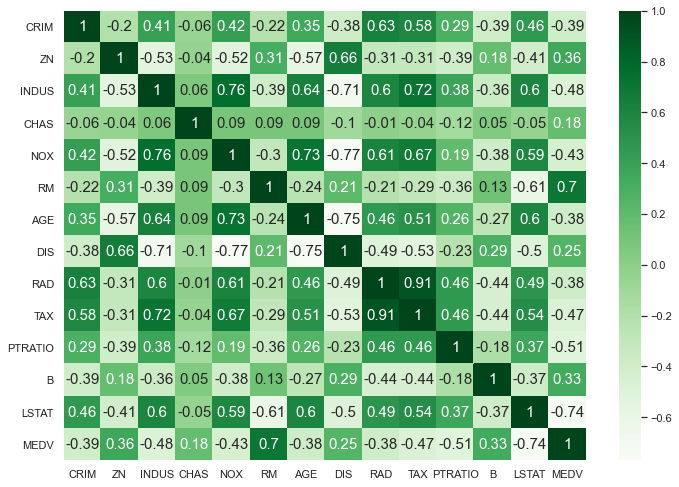

In [36]:
#creating heatmap using seaborn library
correlation_matrix = data.corr().round(2)

# annot = True to print the values inside the square
sb.heatmap(data = correlation_matrix, annot = True,annot_kws={'size':15}, cmap='Greens');

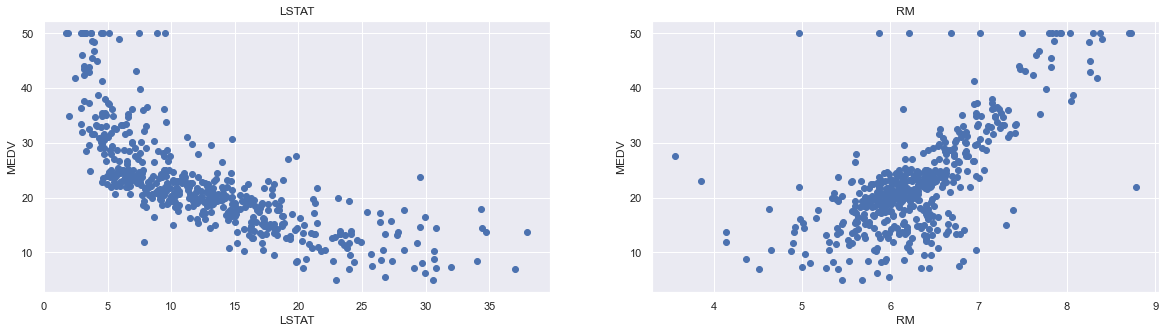

In [25]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [27]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [30]:
Y_pred = reg.predict(X_train)
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [31]:
print('R^2:', metrics.r2_score(Y_train, Y_pred))
#r2 = metrics.r2_score(Y_train, Y_pred)
#print(r2)

R^2: 0.9605818900230321


In [32]:
#print('Adjusted R^2:', 1 - (1-metrics.r2_score(Y_train, Y_pred) * len(Y_train) - X_train.shape[1]-1))
#print(1 - (1-r2 * (len(Y_train) - 1/(len(Y_train) - X_train.shape[0] - 1))))

### Model Evaluation

In [33]:
rmse = (np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

print("The model performance(RMSE):")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('\n')

mse = (metrics.mean_squared_error(Y_train, Y_pred))

print("The model performance(MSE):")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

mae = (metrics.mean_absolute_error(Y_train, Y_pred))

print("The model performance(MAE):")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

The model performance(RMSE):
--------------------------------------
RMSE is 1.8401311262736666


The model performance(MSE):
--------------------------------------
MSE is 3.3860825618811927


The model performance(MAE):
--------------------------------------
MAE is 1.230324257425742




### Data Visualisation

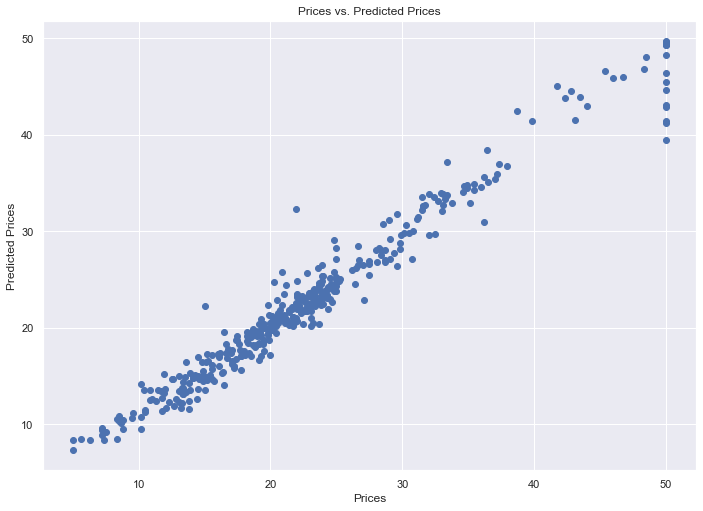

In [34]:
plt.scatter(Y_train, Y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs. Predicted Prices')
plt.show()

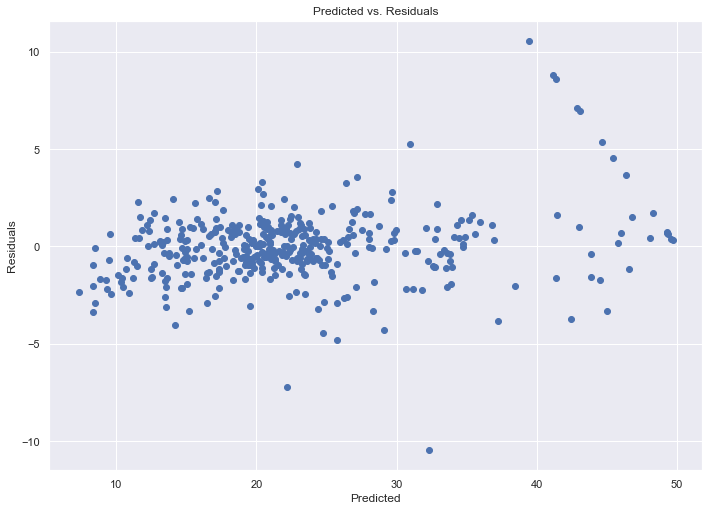

In [35]:
plt.scatter(Y_pred, Y_train - Y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title("Predicted vs. Residuals")
plt.show()

### Results

1. Random Forest Regressor works best for this dataset.
2. R2 score is 96% accurate on this dataset.